In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [2]:
ls

CONTRIBUTING.md    Round 1.ipynb      Round 4.ipynb      halfway-there.gif
LICENSE.md         Round 2.....ipynb  Round 5.ipynb
README.md          Round 3.....ipynb  data/


In [3]:
data = pd.read_csv("data/final_clean_housing_data.csv")

In [4]:
data.dtypes

price              int64
date              object
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
display(data.shape)
data.head()

(15429, 20)

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,538000,2014-12-09,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,604000,2014-12-09,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,510000,2015-02-18,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,1230000,2014-05-12,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
4,229500,2015-04-15,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113


In [6]:
data.isna().mean().round(4) * 100

price            0.0
date             0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [7]:
def bootstrap(df,column,target,sample_size=300):
    unique = df[column].unique()
    for val in unique:
        samples = []
        frame = df[df[column] == val]
        for i in range(sample_size):
            sample = np.random.choice(frame[target], size = frame.shape[0], replace = True)
            samples.append(sample.mean())
        plt.hist(samples, label = val, alpha =.7)
    plt.legend();

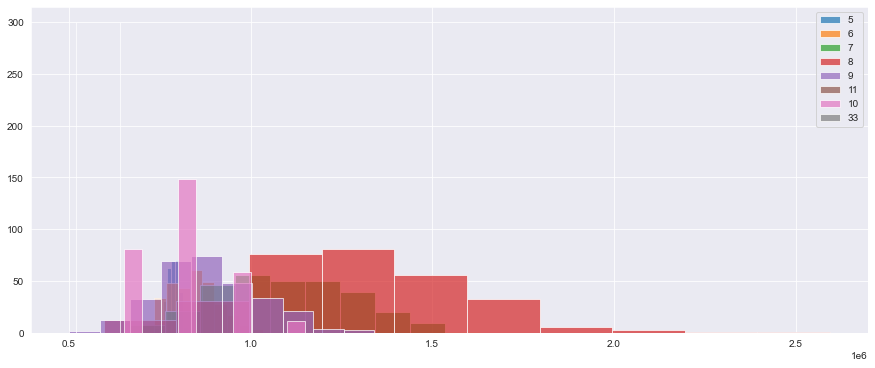

In [8]:
plt.figure(figsize = (15,6))
frame = data[data.bedrooms>4]
bootstrap(frame,'bedrooms','price')

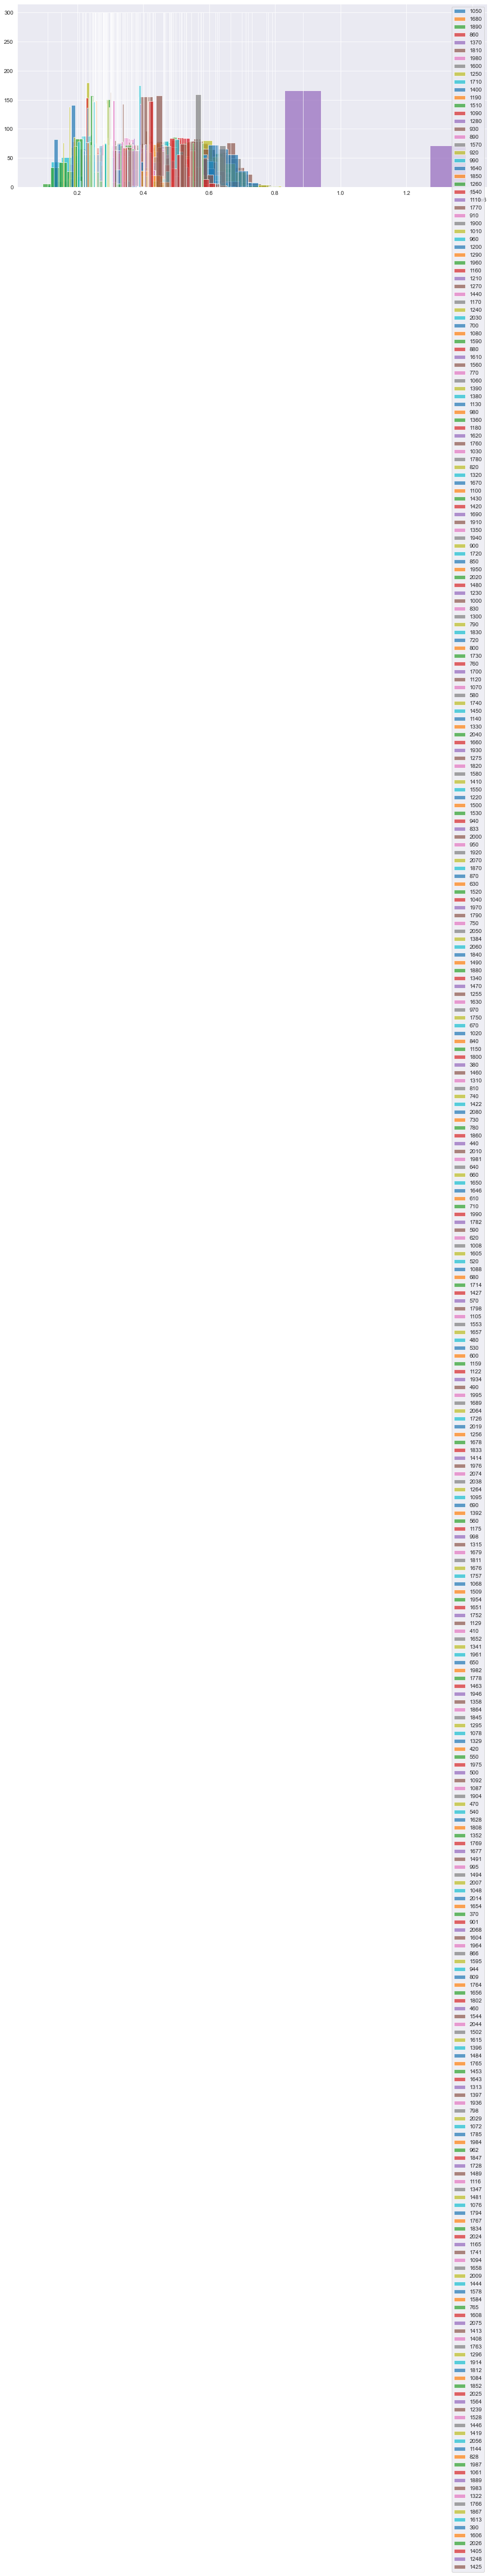

In [9]:
plt.figure(figsize = (15,6))
frame = data[data.sqft_above<2090]
bootstrap(frame,'sqft_above','price')

In [10]:
df = data.drop(columns=['lat','long'])

In [11]:
# df = pd.DataFrame(df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)])

In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,1.542900e+04,15429.000000,15429.000000,15429.00000,1.542900e+04,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000
mean,5.414978e+05,3.378767,1.754229,2085.51656,1.528616e+04,1.447339,0.007518,0.228855,3.410979,7.664204,1793.705230,291.811329,1971.130533,81.766544,98077.472098,1990.926891,12862.281159
std,3.730219e+05,0.934200,0.733917,919.54924,4.199737e+04,0.550677,0.086384,0.759902,0.651825,1.173757,829.165362,443.366153,29.287947,395.668685,53.459610,684.796238,27783.533647
min,8.200000e+04,1.000000,0.000000,370.00000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,659.000000
25%,3.200000e+05,3.000000,1.000000,1430.00000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1920.00000,7.620000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,1850.000000,7626.000000
75%,6.435000e+05,4.000000,2.000000,2550.00000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,2370.000000,10108.000000
max,7.700000e+06,33.000000,8.000000,13540.00000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [13]:
df.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,538000,2014-12-09,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639
1,604000,2014-12-09,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000
2,510000,2015-02-18,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503
3,1230000,2014-05-12,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,4760,101930
4,229500,2015-04-15,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,1780,8113


# Feature Engineering Time

In [14]:
# How old are the homes?

In [15]:
df['age'] = 2021 - df.yr_built
df = df.drop(columns=['yr_built'], axis=1)

In [16]:
#Convert date column to 2 separate columns for month and year
date = df['date'].str.split('-', expand=True)
df['month_sold'] = date[1].astype('int64')
df['year_sold'] = date[0].astype('int64')
#Drop original date column
df.drop(columns=['date'], axis=1, inplace=True)

In [17]:
# Let's change yr_renovated to a binary column? Since it's not manadatory to have renovated your home

In [18]:
df.yr_renovated.fillna(0.0, inplace=True)
#Create renovated column
df['renovated'] = df.year_sold - df.yr_renovated
#Replace any values less than 10 with 1, and any values over 10 with 0renovated = df.renovated.values
age = df.age.values
values = np.where(df.renovated <= 10, 1, 0)
df['renovated'] = np.where(age <= 5, 1, values)
#Drop yr_renovated column
df.drop(columns=['yr_renovated'], axis=1, inplace=True)

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age,month_sold,year_sold,renovated
0,538000,3,2,2570,7242,2,0,0,3,7,2170,400,98125,1690,7639,70,12,2014,0
1,604000,4,3,1960,5000,1,0,0,5,7,1050,910,98136,1360,5000,56,12,2014,0
2,510000,3,2,1680,8080,1,0,0,3,8,1680,0,98074,1800,7503,34,2,2015,0
3,1230000,4,4,5420,101930,1,0,0,3,11,3890,1530,98053,4760,101930,20,5,2014,0
4,229500,3,1,1780,7470,1,0,0,3,7,1050,730,98146,1780,8113,61,4,2015,0


In [20]:
# sqft_livingsquare  -  footage of the home
# sqft_lotsquare-  footage of the lot

# sqft_above - square footage of house apart from basement
# sqft_basement - square footage of the basement

# sqft_above + sqft_basement = sqft_livingsquare
df['yard_space'] = df.sqft_lot - df.sqft_living

# Corr Time

In [21]:
df_corr = df.corr()
df_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age,month_sold,year_sold,renovated,yard_space
price,1.000000,0.305792,0.511440,0.706498,0.084687,0.240299,0.275718,0.397786,0.033172,0.664356,0.612374,0.320053,-0.049371,0.583400,0.080569,-0.050528,-0.008817,0.005090,0.076125,0.069453
bedrooms,0.305792,1.000000,0.462788,0.572496,0.025216,0.161998,-0.003162,0.082774,0.019930,0.354515,0.473552,0.301747,-0.145820,0.389219,0.024887,-0.155152,-0.007001,-0.002631,0.025674,0.012724
bathrooms,0.511440,0.462788,1.000000,0.697425,0.078444,0.490007,0.061863,0.170243,-0.132181,0.606207,0.640189,0.249216,-0.155687,0.511166,0.075629,-0.430829,0.004593,-0.020037,0.054677,0.063388
sqft_living,0.706498,0.572496,0.697425,1.000000,0.164947,0.359324,0.113004,0.287242,-0.063788,0.764804,0.876449,0.434918,-0.195350,0.756714,0.177463,-0.315959,0.010580,-0.024170,0.030113,0.143537
sqft_lot,0.084687,0.025216,0.078444,0.164947,1.000000,-0.010644,0.025439,0.077358,-0.017631,0.109153,0.173922,0.016843,-0.128448,0.143464,0.716502,-0.051962,-0.003783,0.006860,-0.013859,0.999765
floors,0.240299,0.161998,0.490007,0.359324,-0.010644,1.000000,0.015136,0.023148,-0.292459,0.475696,0.523504,-0.233792,-0.096416,0.299615,-0.013340,-0.578915,0.013523,-0.016218,-0.017342,-0.018574
waterfront,0.275718,-0.003162,0.061863,0.113004,0.025439,0.015136,1.000000,0.407260,0.016492,0.083712,0.077547,0.089348,0.029253,0.092188,0.029103,0.023061,0.015235,-0.010199,0.000855,0.023043
view,0.397786,0.082774,0.170243,0.287242,0.077358,0.023148,0.407260,1.000000,0.045517,0.249090,0.172230,0.273648,0.085805,0.278924,0.071488,0.055113,-0.000430,-0.001999,0.028184,0.071310
condition,0.033172,0.019930,-0.132181,-0.063788,-0.017631,-0.292459,0.016492,0.045517,1.000000,-0.149082,-0.157904,0.163007,0.002036,-0.097054,-0.007236,0.366719,0.014872,-0.040594,-0.072502,-0.016289
grade,0.664356,0.354515,0.606207,0.764804,0.109153,0.475696,0.083712,0.249090,-0.149082,1.000000,0.759170,0.166449,-0.183671,0.717216,0.118319,-0.443804,0.007494,-0.024909,0.018013,0.092721


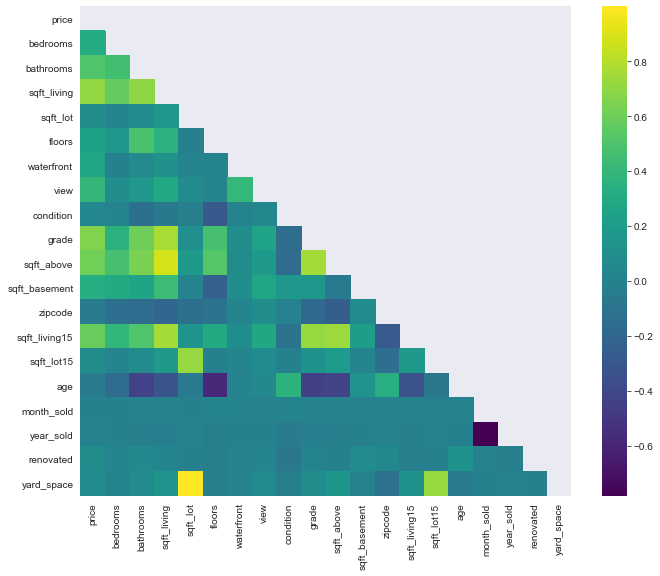

In [22]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, ax=ax1, cmap="viridis");

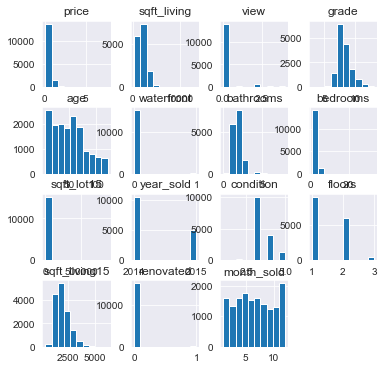

In [23]:
df[['price', 'sqft_living', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15', 'year_sold', 'condition', 'floors', 'sqft_living15','renovated', 'month_sold']].hist(figsize  = [6, 6]); 

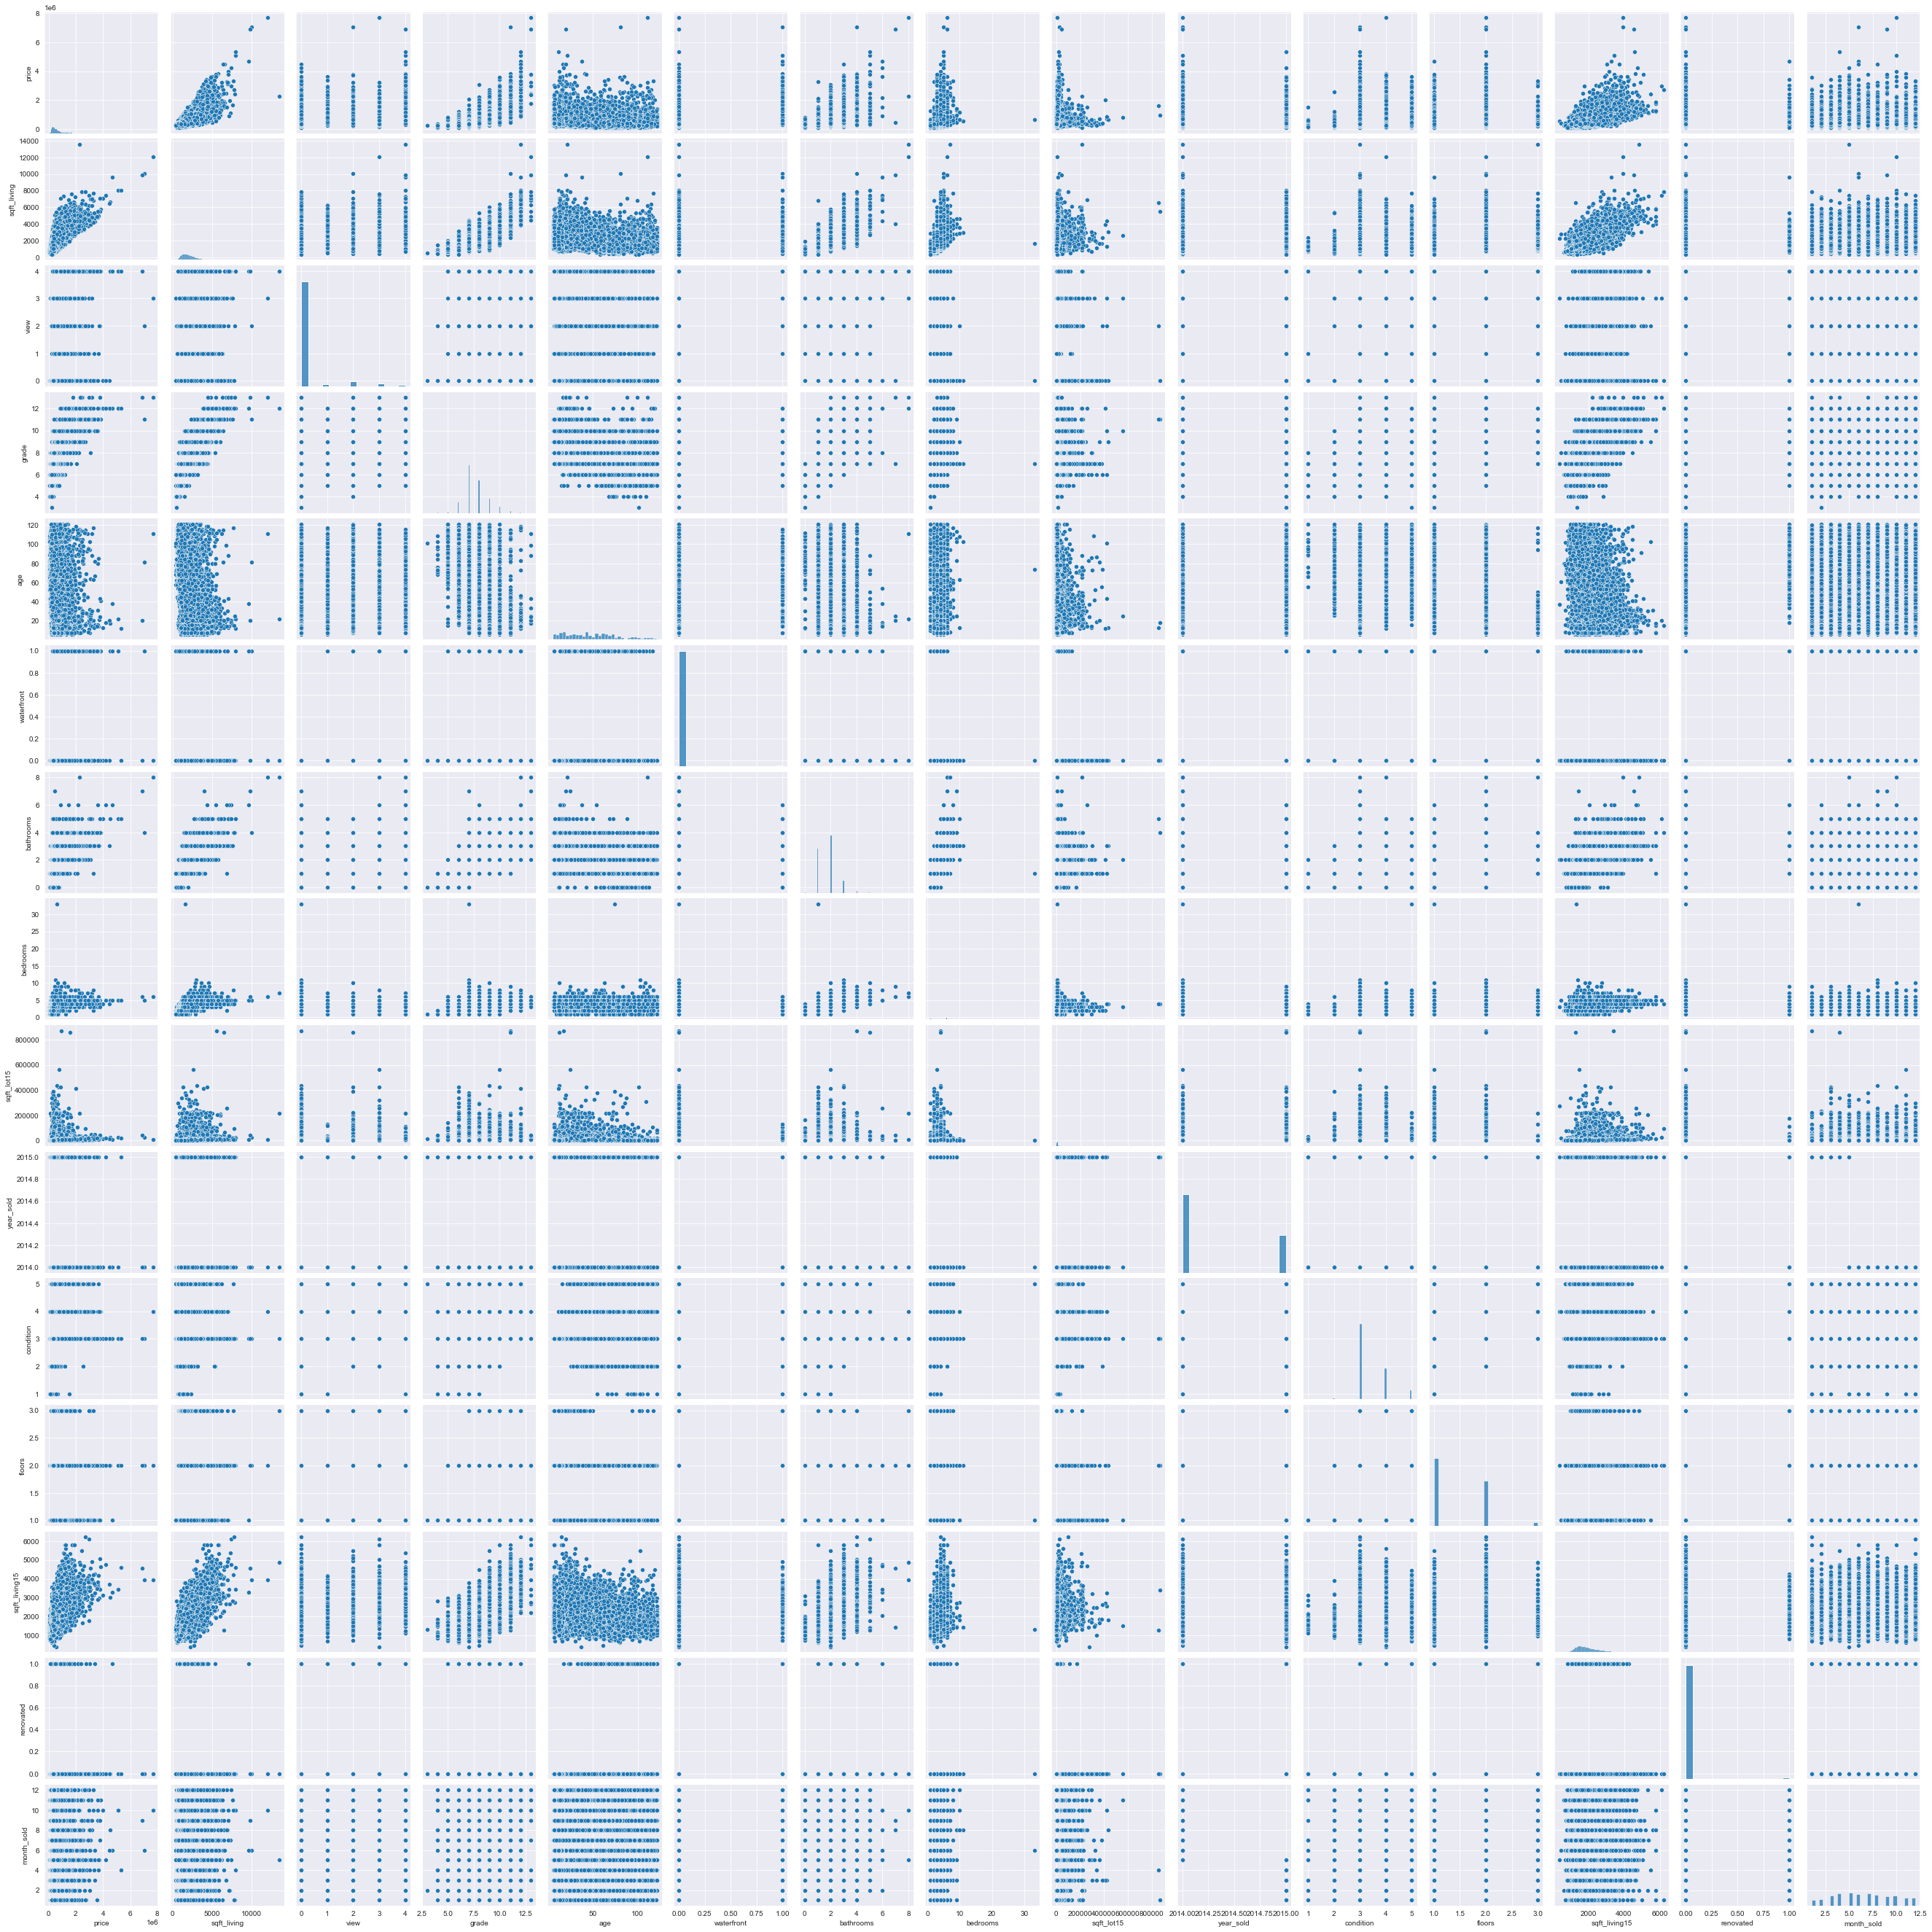

In [24]:
model1_cols = ['price', 'sqft_living', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15', 'year_sold', 'condition', 'floors', 'sqft_living15','renovated', 'month_sold']
model1 = df[model1_cols]
sns.pairplot(model1);

In [25]:
fsm_df1 = model1.copy()
fsm_df1.dropna(inplace=True)

In [26]:
fsm1 = ols(formula ="price ~ sqft_living + view + grade + age + waterfront + bathrooms + bedrooms + sqft_lot15 + year_sold + condition + floors + sqft_living15 + renovated + month_sold", data=fsm_df1)
fsm_results1 = fsm1.fit()

In [27]:
fsm_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2133.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:36:26   Log-Likelihood:            -2.1152e+05
No. Observations:               15429   AIC:                         4.231e+05
Df Residuals:                   15414   BIC:                         4.232e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.357e+07   1.21e+07     -5.239      0.000   -8.74e+07   -3.98e+07
sqft_living     170.9374      4.158     41.114      0.000     162.788     179.087
view           4.398e+04   2686.513     16.372      0.000    3.87e+04    4.92e+04
grade           1.18e+05   2682.860     43.991      0.000    1.13e+05    1.23e+05
age            3613.0037     81.752     44.195      0.000    3452.760    3773.247
waterfront     6.213e+05   2.23e+04     27.898      0.000    5.78e+05    6.65e+05
bathrooms      5.519e+04   3678.834     15.001      0.000     4.8e+04    6.24e+04
bedrooms      -4.002e+04   2371.576    -16.875      0.000   -4.47e+04   -3.54e+04
sqft_lot15       -0.5333      0.065     -8.196      0.000      -0.661      -0.406
year_sold      3.105e+04   6021.121      5.157      0.000    1.92e+04    4.29e+04
condition      2.168e+04   2953.740      7.341      0.000    1.59e+04    2.75e+04
floors          2.43e+04   4274.840      5.686      0.000    1.59e+04    3.27e+04
sqft_living15    19.5855      4.220      4.641      0.000      11.314      27.857
renovated      5.944e+04   1.43e+04      4.148      0.000    3.14e+04    8.75e+04
month_sold      969.9003    902.410      1.075      0.282    -798.929    2738.730
==============================================================================
Omnibus:                    11875.934   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           952210.238
Skew:                           3.087   Prob(JB):                         0.00
Kurtosis:                      40.988   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  Model 1, Evaluation:

We are explaining about 66% of the variance in home price, with our 14 features so far and it's statistically significant.

According to our model:

 - A home price is expected to have an average price of ????
 
 - For each additional footage of the home, we expect the home price to increase 171
 
 - For each additional bathroom, we expect the home price to increase by 9600
 
 - ...
 

## Linearity Model 1 Assumption 

The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not.

Thus returning a p-value below .05 means that the current model does NOT meet the linearity assumption.

In [28]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results1)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0798306203776018
Rainbow p-value: 0.0003748548998356076


/Users/sammy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/regressionplots.py:561: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()
<ipython-input-29-03bafe4327ba>:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad=1)


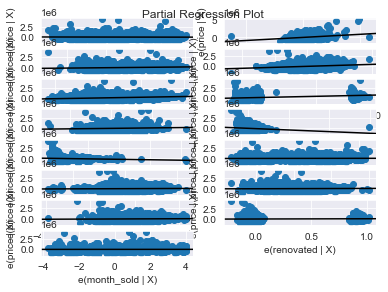

In [29]:
fig = sm.graphics.plot_partregress_grid(fsm_results1)
fig.tight_layout(pad=1)

## Normality Model 1 Assumption

Linear regression assumes that the residuals are normally distributed. The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. 

Thus returning a low p-value means that the current model violates the normality assumption.

In [30]:
# Jarque-Bera (JB):952210.238
# Prob(JB): 0.00

## Homoscadasticity for Model 1:

Linear regression assumes that the variance of the dependent variable is homogeneous across different value of the independent variable(s). 

We can visualize this by looking at the predicted life expectancy vs. the residuals.

The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity. 

Thus returning a low p-value means that the current model violates the homoscedasticity assumption.

In [31]:
y = fsm_df1["price"]
y_hat = fsm_results1.predict()

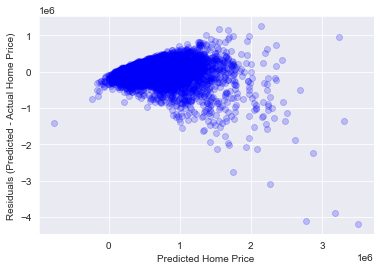

In [32]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Home Price",
        ylabel="Residuals (Predicted - Actual Home Price)")
ax2.scatter(x = y_hat, y = y_hat-y, color="blue", alpha=0.2);

In [33]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df1[['sqft_living', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15', 'year_sold', 'condition', 'floors', 'sqft_living15','renovated', 'month_sold']])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


## Independence for Model 1:

You might have noticed in the regression output that there was a warning about the condition number being high. 

The condition number is a measure of stability of the matrix used for computing the regression and a number above 30 can indicate strong multicollinearity. 

Our output was 2.12e+08

##### A "rule of thumb" for VIF is that 5 is too high, so I think it's reasonable to say that we are violating the independence assumption, despite the high condition number.

INF?

In [34]:
rows = fsm_df1[['sqft_living', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15', 'year_sold', 'condition', 'floors', 'sqft_living15','renovated', 'month_sold']].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(14)]
vif_df["feature"] = ['sqft_living', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15', 'year_sold', 'condition', 'floors', 'sqft_living15','renovated', 'month_sold']

vif_df

,VIF,feature
0,29.221247,sqft_living
1,1.479168,view
2,140.787714,grade
3,7.274863,age
4,1.213450,waterfront
5,15.923479,bathrooms
6,22.492791,bedrooms
7,1.291688,sqft_lot15
8,146.308184,year_sold
9,34.144244,condition


# Summary for Model 1 :

fdsd

### Improving Linearity 

In [46]:
improvement_model1 = model1
improvement_model1.head()

,price,sqft_living,view,grade,age,waterfront,bathrooms,bedrooms,sqft_lot15,year_sold,condition,floors,sqft_living15,renovated,month_sold
0,538000,2570,0,7,70,0,2,3,7639,2014,3,2,1690,0,12
1,604000,1960,0,7,56,0,3,4,5000,2014,5,1,1360,0,12
2,510000,1680,0,8,34,0,2,3,7503,2015,3,1,1800,0,2
3,1230000,5420,0,11,20,0,4,4,101930,2014,3,1,4760,0,5
4,229500,1780,0,7,61,0,1,3,8113,2015,3,1,1780,0,4


In [45]:
improvement_model1.describe()

,price,sqft_living,view,grade,age,waterfront,bathrooms,bedrooms,sqft_lot15,year_sold,condition,floors,sqft_living15,renovated,month_sold
count,1.393500e+04,13935.000000,13935.000000,13935.000000,13935.000000,13935.0,13935.00000,13935.000000,13935.000000,13935.000000,13935.000000,13935.000000,13935.000000,13935.0,13935.000000
mean,4.840293e+05,1964.027700,0.093721,7.543165,49.720201,0.0,1.67657,3.328956,9533.771367,2014.324291,3.419806,1.433728,1913.991389,0.0,6.567133
std,2.348910e+05,749.145174,0.404475,1.030947,29.123426,0.0,0.63062,0.848933,9989.104322,0.468126,0.648841,0.549446,597.938553,0.0,3.115371
min,8.200000e+04,370.000000,0.000000,5.000000,6.000000,0.0,0.00000,1.000000,659.000000,2014.000000,2.000000,1.000000,460.000000,0.0,1.000000
25%,3.125000e+05,1400.000000,0.000000,7.000000,24.000000,0.0,1.00000,3.000000,5002.500000,2014.000000,3.000000,1.000000,1470.000000,0.0,4.000000
50%,4.350000e+05,1850.000000,0.000000,7.000000,46.000000,0.0,2.00000,3.000000,7500.000000,2014.000000,3.000000,1.000000,1800.000000,0.0,6.000000
75%,6.000000e+05,2420.000000,0.000000,8.000000,69.000000,0.0,2.00000,4.000000,9721.000000,2015.000000,4.000000,2.000000,2270.000000,0.0,9.000000
max,1.660000e+06,4790.000000,2.000000,11.000000,121.000000,0.0,3.00000,6.000000,95832.000000,2015.000000,5.000000,3.000000,4040.000000,0.0,12.000000


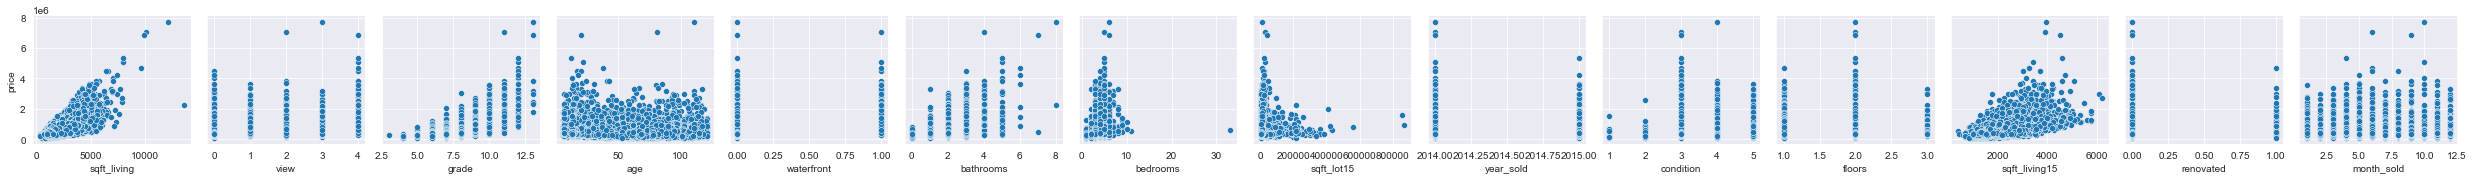

In [53]:
sns_pp = sns.pairplot(data = improvement_model1,
                  y_vars=['price'],
                  x_vars=['sqft_living', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15', 'year_sold', 'condition', 'floors', 'sqft_living15','renovated', 'month_sold'])
plt.show()

### Removing Outliers